In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

#Loading dataset 
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [86]:
df_ind=df[(df['job_country']=="India")].dropna(subset=['salary_year_avg']).copy()



In [87]:
df_ind=df_ind[df_ind['salary_year_avg'] > 40000]   # drop too-low salaries


In [88]:
job_titles=['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [89]:
df_ind_top_data_roles=df_ind[df_ind['job_title_short'].isin(job_titles)]

In [90]:
order=df_ind_top_data_roles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

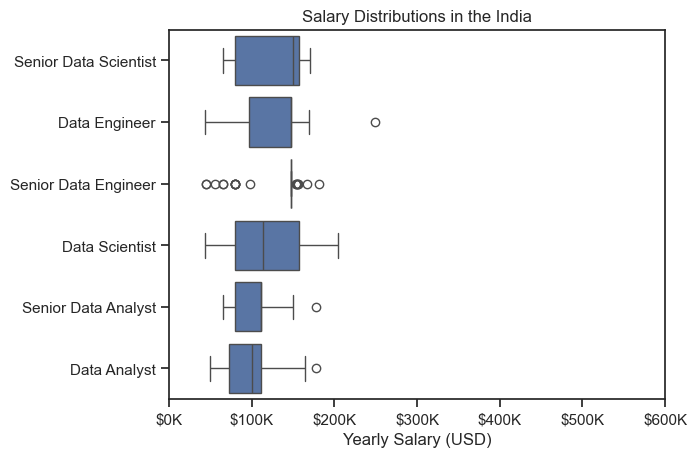

In [91]:
sns.boxplot(data=df_ind_top_data_roles, x='salary_year_avg', y='job_title_short',order=order)
sns.set_theme(style='ticks')
#this is all the same
plt.title('Salary Distributions in the India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [122]:
df_ind_da=df[(df['job_country']=="India")&(df['job_title_short']=='Data Analyst')].copy()
df_ind_da=df_ind_da.dropna(subset='salary_year_avg')
df_ind_da=df_ind_da.explode('job_skills')
df_top_pay


,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [107]:
df_top_pay=df_ind_da.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

In [118]:
df_top_skills=df_ind_da.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_top_skills=df_top_skills.head(10).sort_values(by='median',ascending=False)
df_top_skills

,count,median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


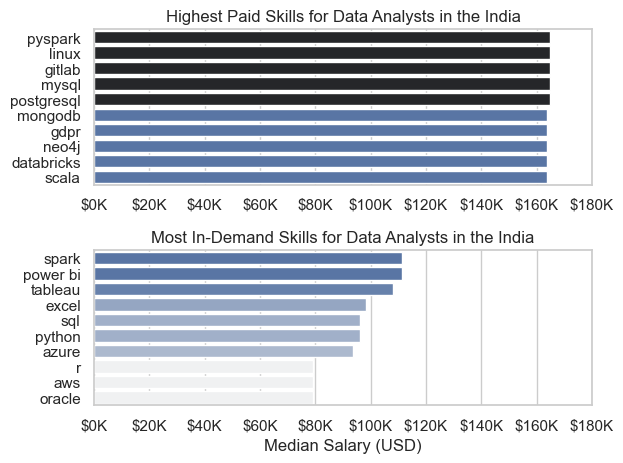

In [ ]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0,180000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_top_skills, x='median', y=df_top_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='whitegrid')
plt.tight_layout()
plt.show()